In [50]:
import numpy as np
import natsort
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive
from glob import glob

In [51]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
def sortlist(filelist):
    filelist = natsort.natsorted(filelist)
    return filelist

In [57]:
class image_processing():
    def __init__(self, path_list, save_path):
        self.rgb_img_path = path_list
        self.save_path = save_path
        self.img_zero_padding(self.rgb_img_path)

    def img_zero_padding(self, path):
        file_cnt = 0
        for file_path in path:
            file_cnt += 1

            img = cv2.imread(file_path)

            max_col_size = 800 * 8 # 6400
            max_row_size = 800 * 8 #6400

            zero_row_len = 6400 - img.shape[0]
            zero_col_len = 6400 - img.shape[1]
            
            zero_row = zero_row_len // 2

            if zero_row_len % 2 != 0:

                zero_row_top_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                zero_row_bottom_bar = np.zeros((zero_row+1, img.shape[1], 3), dtype=np.uint8)
            else:
                zero_row_top_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                zero_row_bottom_bar = np.zeros((zero_row, img.shape[1], 3), dtype=np.uint8)
                
            row_padding = np.vstack((zero_row_top_bar, img))
            row_padding = np.vstack((row_padding, zero_row_bottom_bar))

            zero_col = zero_col_len // 2
            zero_col_bar = np.zeros((row_padding.shape[0], zero_col, 3), dtype=np.uint8)
            zero_col_right_bar = np.zeros((row_padding.shape[0], zero_col+1, 3), dtype=np.uint8)
            col_padding = np.hstack((zero_col_bar, row_padding))
            col_padding = np.hstack((col_padding, zero_col_right_bar))

            self.patch_img(col_padding, file_cnt)

            print(file_cnt, "번째 전처리 완료")

    def patch_img(self, image, img_cnt_num):
        img_cnt = 0
        file_cnt2 = 0
        for i in range(8):
            for j in range(8):
                file_cnt2 += 1 
                save_path = self.save_path + f'img{img_cnt_num}_{file_cnt2}.png'
                patch_img = image[i*800: i*800 + 800, j*800: j*800+800, :]
                img_cnt += 1
                cv2.imwrite(save_path, patch_img)

                

In [60]:
def confirm_patch(path, img_num):
    file_list = os.listdir(path)

    file_list = sortlist(file_list)

    plt.figure(figsize =(12,12))
    for i in range(64):
        img_path = path + '/' + file_list[(img_num-1)*64 + i]
        img = cv2.imread(img_path)
        plt.subplot(8,8,i+1)
        plt.imshow(img)
    plt.show()

---
# Main Code

In [54]:
train_dir_path = '/content/drive/MyDrive/Cloud_data/cloud_validation/'
train_save_path = '/content/drive/MyDrive/Cloud_data/cloud_validation/zero_patch_img/'

train_file_path = os.path.join(train_dir_path,'validate_clouds_data/png')

train_rgb_file_list = glob(os.path.join(train_file_path,"*RGB*png"))

train_rgb_file_list = sortlist(train_rgb_file_list)

In [55]:
train_rgb_file_list

['/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00006_RGB_K3A_NIA0006.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00007_RGB_K3A_NIA0007.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00009_RGB_K3A_NIA0009.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00010_RGB_K3A_NIA0010.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00020_RGB_K3A_NIA0020.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00025_RGB_K3A_NIA0025.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00043_RGB_K3_NIA0043.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00049_RGB_K3_NIA0049.png',
 '/content/drive/MyDrive/Cloud_data/cloud_validation/validate_clouds_data/png/CLD00057_RGB_K3_NIA0057.png',
 '/content/drive/MyDri

In [58]:
run_train_img = image_processing(train_rgb_file_list, train_save_path)

1 번째 전처리 완료
2 번째 전처리 완료
3 번째 전처리 완료
4 번째 전처리 완료
5 번째 전처리 완료
6 번째 전처리 완료
7 번째 전처리 완료
8 번째 전처리 완료
9 번째 전처리 완료
10 번째 전처리 완료
11 번째 전처리 완료
12 번째 전처리 완료
13 번째 전처리 완료
14 번째 전처리 완료
15 번째 전처리 완료
16 번째 전처리 완료


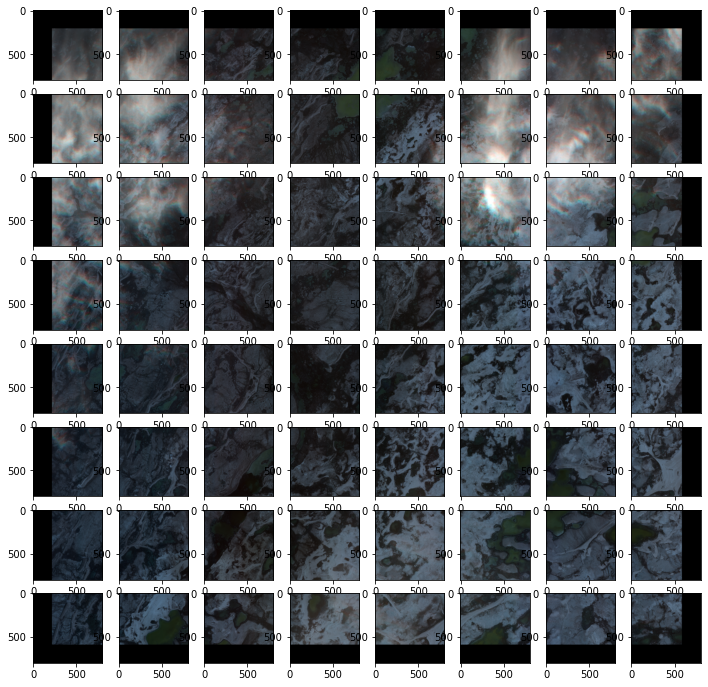

In [61]:
confirm_patch(train_save_path, 1)

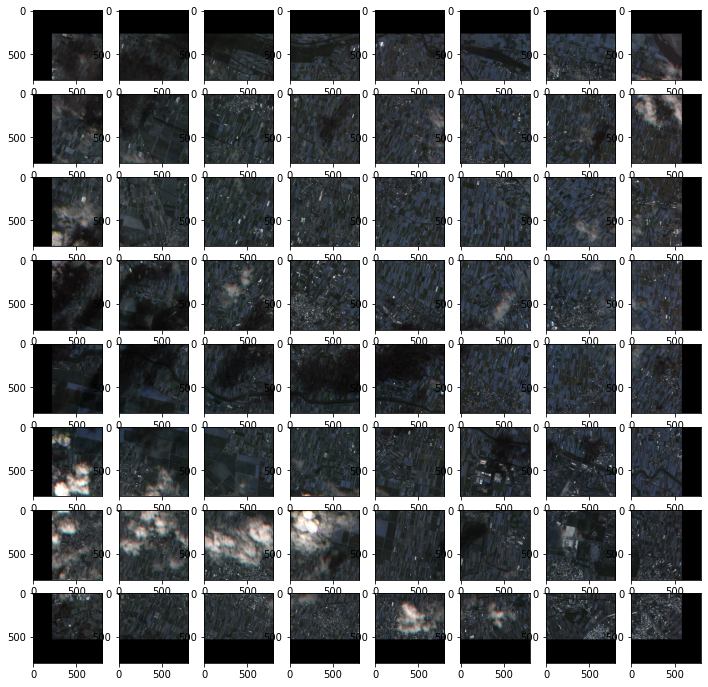

In [62]:
confirm_patch(train_save_path, 2)

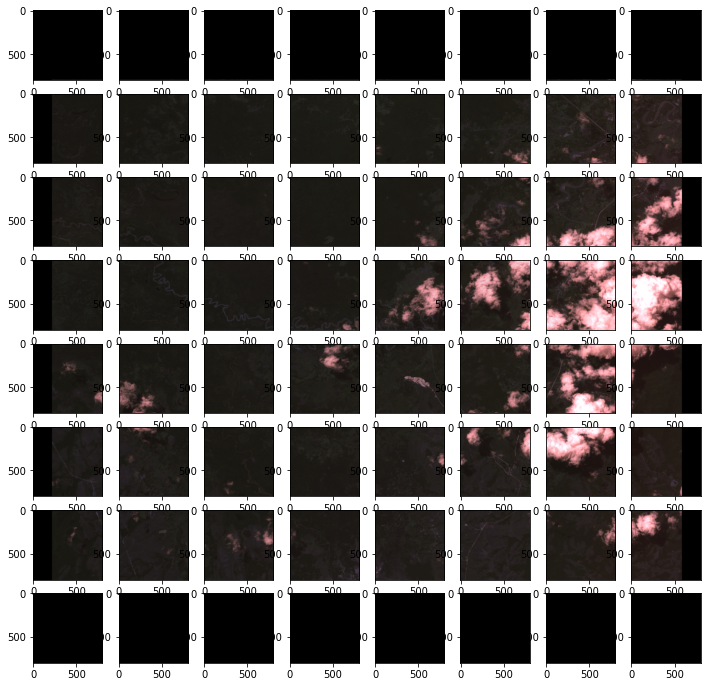

In [64]:
confirm_patch(train_save_path, 10)